# Bird Species Image Classifciation

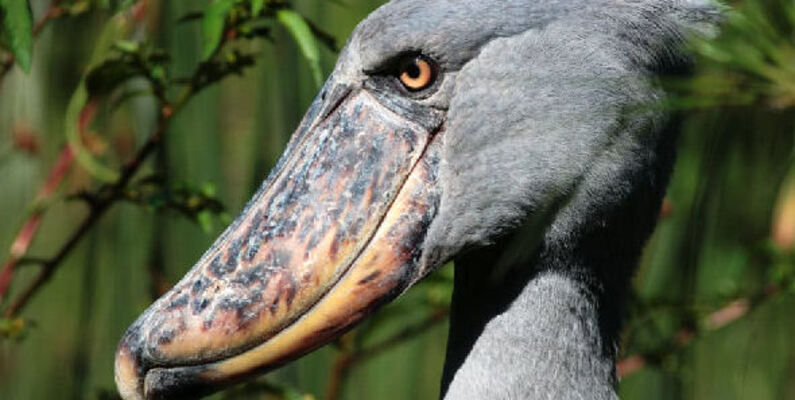

This version of the dataset adds 10 new species to the previous version. In addition using a dataset analysis tool I was able to clean the dataset so that there are no duplicate or near-duplicate images in the dataset. This ensures no leakage between the train, test and validation datasets. Also so defective low information images were also removed. So now you are using a clean dataset.

Data set of 525 bird species. 84635 training images, 2625 test images(5 images per species) and 2625 validation images(5 images per species. This is a very high quality dataset where there is only one bird in each image and the bird typically takes up at least 50% of the pixels in the image. As a result even a moderately complex model will achieve training and test accuracies in the mid 90% range. Note: all images are original and not created by augmentation

All images are 224 X 224 X 3 color images in jpg format. Data set includes a train set, test set and validation set. Each set contains 525 sub directories, one for each bird species. The data structure is convenient if you use the Keras ImageDataGenerator.flow_from_directory to create the train, test and valid data generators. The data set also include a file birds.csv. This cvs file contains 5 columns. The filepaths column contains the relative file path to an image file. The labels column contains the bird species class name associated with the image file. The scientific label column contains the latin scientific name for the image. The data set column denotes which dataset (train, test or valid) the filepath resides in. The class_id column contains the class index value associated with the image file's class.

## Data-Colection and Pre-processing

Images were gathered from internet searches by species name. Once the image files for a species was downloaded they were checked for the presemce of duplicate or near duplicate images. All duplicate or near duplicate images detected were deleted in order to prevent their being images common between the training, test and validation sets.

After that the images were cropped so that the bird in most cases occupies at least 50% of the pixel in the image. Then the images were resized to 224 X 224 X3 in jpg format. The cropping ensures that when processed by a CNN their is adequate information in the images to create a highly accurate classifier. Even a moderately robust model should achieve training, validation and test accuracies in the high 90% range. Because of the large size of the dataset I recommend if you try to train a model use and image size of 150 X 150 X 3 in order to reduce training time. All files were also numbered sequential starting from one for each species. So test images are named 1.jpg to 5.jpg. Similarly for validation images. Training images are also numbered sequentially with "zeros" padding. For example 001.jpg, 002.jpg ….010.jpg, 011.jpg …..099.jpg, 100jpg, 102.jpg etc. The zero's padding preserves the file order when used with python file functions and Keras flow from directory.
The training set is not balanced, having a varying number of files per species. However each species has at least 130 training image files.

One significant shortcoming in the data set is the ratio of male species images to female species images. About 80% of the images are of the male and 20% of the female. Males typical are far more diversely colored while the females of a species are typically bland. Consequently male and female images may look entirely different .Almost all test and validation images are taken from the male of the species. Consequently the classifier may not perform as well on female specie images.



In [1]:
#import data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

#import tensorflow libraries
from tensorflow import keras
from tensorflow.keras import layers, models, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers.experimental import preprocessing

#system libraries
from pathlib import Path
import os
import random

#Visualization Libraries
import matplotlib.cm as cm
import cv2
import seaborn as sns

sns.set_style('darkgrid')

#Metrics
from sklearn.metrics import classification_report, confusion_matrix
import itertools



In [2]:
def walk_through_dir(dir_path):
    '''
    walk through directory returning it's content
    Args:
        Dir_path(str)
    Returns:
        A print out of:
            number of subdirectories
            number of images/files in each directory
            name of each subdirectory
    '''  
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} files/images in {dirpath}')
    

In [13]:
#Load and Transform the data

BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

#Walk through Train
dataset = 'Dataset/train'
walk_through_dir(dataset)


There are 525 directories and 0 files/images in Dataset/train
There are 0 directories and 163 files/images in Dataset/train\ABBOTTS BABBLER
There are 0 directories and 180 files/images in Dataset/train\ABBOTTS BOOBY
There are 0 directories and 179 files/images in Dataset/train\ABYSSINIAN GROUND HORNBILL
There are 0 directories and 135 files/images in Dataset/train\AFRICAN CROWNED CRANE
There are 0 directories and 154 files/images in Dataset/train\AFRICAN EMERALD CUCKOO
There are 0 directories and 137 files/images in Dataset/train\AFRICAN FIREFINCH
There are 0 directories and 155 files/images in Dataset/train\AFRICAN OYSTER CATCHER
There are 0 directories and 187 files/images in Dataset/train\AFRICAN PIED HORNBILL
There are 0 directories and 179 files/images in Dataset/train\AFRICAN PYGMY GOOSE
There are 0 directories and 132 files/images in Dataset/train\ALBATROSS
There are 0 directories and 161 files/images in Dataset/train\ALBERTS TOWHEE
There are 0 directories and 165 files/images i

There are 0 directories and 193 files/images in Dataset/train\RAZORBILL
There are 0 directories and 197 files/images in Dataset/train\RED BEARDED BEE EATER
There are 0 directories and 146 files/images in Dataset/train\RED BELLIED PITTA
There are 0 directories and 212 files/images in Dataset/train\RED BILLED TROPICBIRD
There are 0 directories and 136 files/images in Dataset/train\RED BROWED FINCH
There are 0 directories and 191 files/images in Dataset/train\RED CROSSBILL
There are 0 directories and 153 files/images in Dataset/train\RED FACED CORMORANT
There are 0 directories and 167 files/images in Dataset/train\RED FACED WARBLER
There are 0 directories and 167 files/images in Dataset/train\RED FODY
There are 0 directories and 160 files/images in Dataset/train\RED HEADED DUCK
There are 0 directories and 133 files/images in Dataset/train\RED HEADED WOODPECKER
There are 0 directories and 200 files/images in Dataset/train\RED KNOT
There are 0 directories and 169 files/images in Dataset/tra

In [34]:
image_dir = Path(dataset)

#get filepath and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: (os.path.split(os.path.split(x)[0])[1]), filepaths))

filepaths = pd.Series(filepaths, name = 'Filepath'). astype(str)
labels = pd.Series(labels, name = 'Label')

#prepare dataframe

image_df = pd.concat([filepaths, labels], axis = 1)

 

In [37]:
image_df

,Filepath,Label
0,Dataset\train\ABBOTTS BABBLER\001.jpg,ABBOTTS BABBLER
1,Dataset\train\ABBOTTS BABBLER\002.jpg,ABBOTTS BABBLER
2,Dataset\train\ABBOTTS BABBLER\003.jpg,ABBOTTS BABBLER
3,Dataset\train\ABBOTTS BABBLER\004.jpg,ABBOTTS BABBLER
4,Dataset\train\ABBOTTS BABBLER\005.jpg,ABBOTTS BABBLER
...,...,...
84630,Dataset\train\ZEBRA DOVE\95.jpg,ZEBRA DOVE
84631,Dataset\train\ZEBRA DOVE\96.jpg,ZEBRA DOVE
84632,Dataset\train\ZEBRA DOVE\97.jpg,ZEBRA DOVE
84633,Dataset\train\ZEBRA DOVE\98.jpg,ZEBRA DOVE


## EDA

In [41]:
image_df['Label'].value_counts()

Label
RUFOUS TREPE               263
HOUSE FINCH                248
OVENBIRD                   233
D-ARNAUDS BARBET           233
ASIAN GREEN BEE EATER      220
                          ... 
RED TAILED THRUSH          130
NORTHERN RED BISHOP        130
AMETHYST WOODSTAR          130
PATAGONIAN SIERRA FINCH    130
SNOWY PLOVER               130
Name: count, Length: 525, dtype: int64

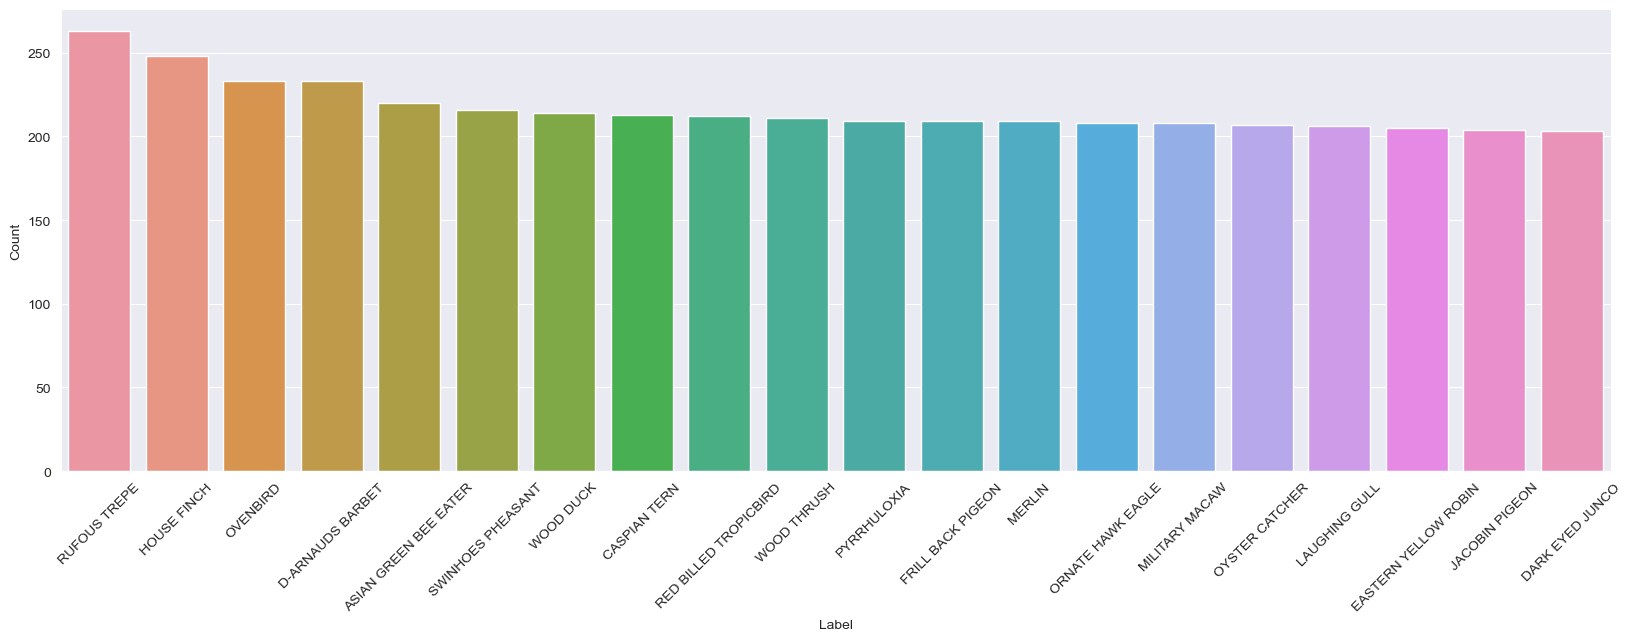

In [43]:
#get top 20 label counts

label_counts = image_df['Label'].value_counts()[:20]

plt.figure(figsize = (20, 6))
sns.barplot(x = label_counts.index, y = label_counts.values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()


### Visualizing Images from Dataset

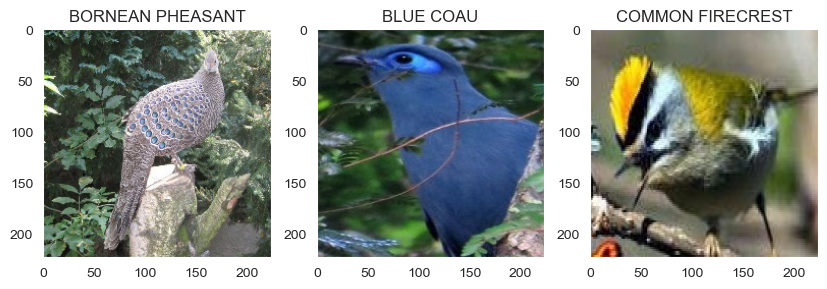

In [56]:

plt.figure (figsize = (10,10))
ax = plt.subplot(1,3,1)
ax.imshow(plt.imread(image_df.Filepath[17000]))
ax.set_title(image_df.Label[17000])
ax.grid(None)
ax = plt.subplot(1,3,2)
ax.imshow(plt.imread(image_df.Filepath[15000]))
ax.set_title(image_df.Label[15000])
ax.grid(None)
ax = plt.subplot(1,3,3)
ax.imshow(plt.imread(image_df.Filepath[25000]))
ax.set_title(image_df.Label[25000])
ax.grid(None)
plt.show()


### Computing Error Level Analysis -

#### compute_ela_cv() function:
takes an image path and a quality parameter, compresses the image using JPEG compression at the given quality, and computes the absolute difference between the compressed and original images. The difference is multiplied by a scale factor and returned.
#### convert_to_ela_image() function :
takes an image path and a quality parameter, compresses the image using JPEG compression at the given quality, computes the absolute difference between the compressed and original images, and returns an ELA image. The ELA image is computed using the difference in pixel values between the original and compressed images, and is normalized to enhance the differences.
#### random_sample() function :
takes a directory path and an optional file extension, and returns a random file path from that directory with the specified extension (if provided).

Finally, the code generates a set of ELA images using the compute_ela_cv() function for a randomly selected image from the test dataset of animals images. The ELA images are generated with decreasing quality levels, resulting in increasing levels of compression and thus increasing levels of error. The resulting images are plotted using matplotlib.

Overall, this code provides a way to visually analyze the effect of different levels of JPEG compression on animals images, and **may be used to identify optimal quality levels for image compression in the context of a animals image classification task**.

In [57]:
def compute_ela_cv(path, quality):
    temp_file_name = 'temp_file_name.jpeg'
    SCALE = 15
    orig_img = cv2.imread(path)
    
    #mandatory line below. Since OPENCV reads images in BGR prder rather RGB
    orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)
    
    #compress the image to quality(parm)
    cv2.imwrite(temp_file_name, orig_img, [cv2.IMWRITE_JPEG_QUALITY, quality])
    
    #read compressed image
    compressed_img = cv2.imread(temp_file_name)
    
    #caclulate absoutedifference betwwen compressed and original image and multiply by scale
    diff = SCALE * cv2.absdiff(orig_img, compressed_img)
    return diff

In [58]:
def convert_to_ela_image(path, quality):
    temp_file_name = 'temp_file_name.jpeg'
    ela_file_name = 'temp_ela.png'
    image = Image.open(path).convert('RGB')
    image.save(temp_file_name, 'JPEG', quality = quality)
    temp_image = Image.openb(temp_file_name)
    
    ela_image = Image.Chops.difference(image, temp_image)
    
    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0/max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    
    return ela_image
    

In [59]:
def random_sample(path, extension = None):
    if extension:
        items = Path(path).glob(f'*.{extension}')
    else:
        items = Path(path).glob(f'*')
    
    items = list(items)
    
    p = random.choice(items)
    return p.as_posix()

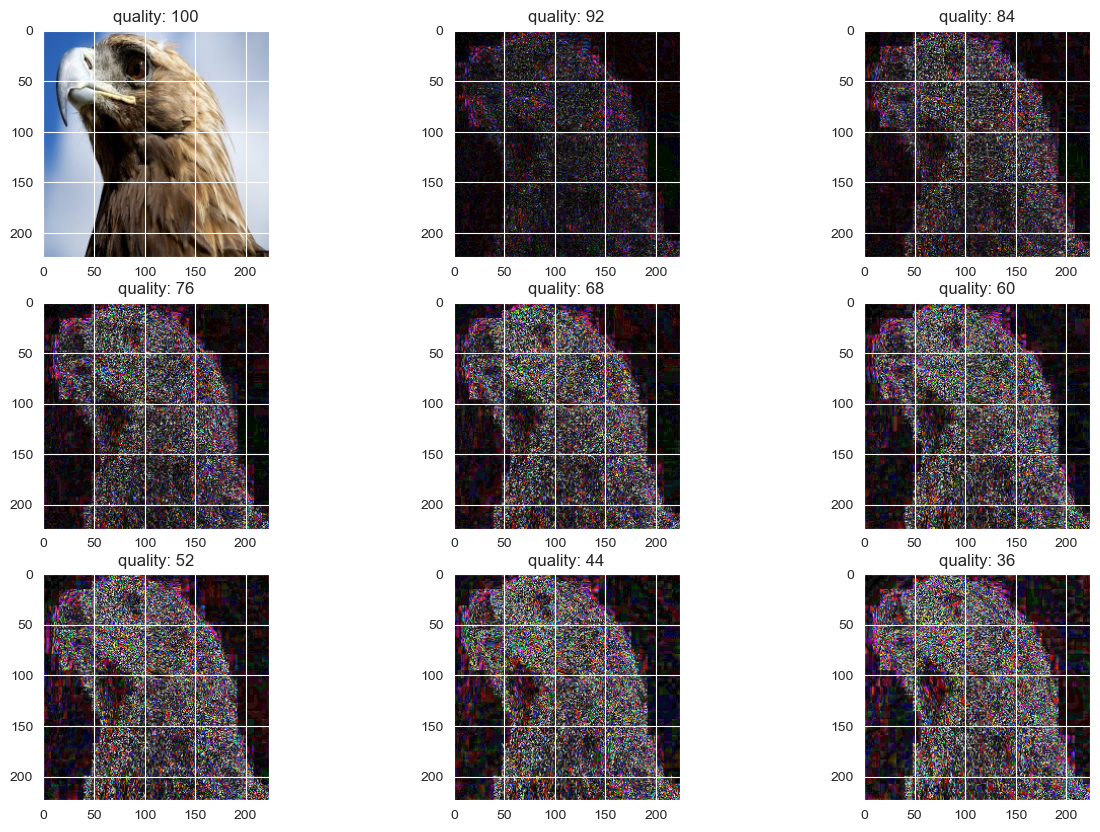

In [61]:
#view a random sample from the dataset

p = random_sample('Dataset/train/GOLDEN EAGLE')
orig = cv2.imread(p)
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)/255.0
init_val = 100
columns = 3
rows = 3

fig = plt.figure(figsize = (15,10))
for i in range(columns * rows):
    quality = init_val - (i) * 8
    img = compute_ela_cv(path = p, quality = quality)
    if i == 0:
        img = orig.copy()
    ax = fig.add_subplot(rows, columns, i+1)
    ax.title.set_text(f'quality: {quality}')
    plt.imshow(img)
plt.show()

### Create the Train, validation and Test Set

In [62]:
train_df = image_df

In [79]:
dataset = 'Dataset/valid'
image_dir = Path(dataset)

#get filepath and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: (os.path.split(os.path.split(x)[0])[1]), filepaths))

filepaths = pd.Series(filepaths, name = 'Filepath'). astype(str)
labels = pd.Series(labels, name = 'Label')

#prepare dataframe

image_df = pd.concat([filepaths, labels], axis = 1)
val_df = image_df


In [75]:
dataset = 'Dataset/test'
image_dir = Path(dataset)

#get filepath and labels
filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.png'))

labels = list(map(lambda x: (os.path.split(os.path.split(x)[0])[1]), filepaths))

filepaths = pd.Series(filepaths, name = 'Filepath'). astype(str)
labels = pd.Series(labels, name = 'Label')

#prepare dataframe

image_df = pd.concat([filepaths, labels], axis = 1)
test_df = image_df

In [80]:
train_generator = ImageDataGenerator(
                                        preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
                                     )
validation_generator = ImageDataGenerator(
                                        preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
                                     )
test_generator = ImageDataGenerator(
                                        preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
                                     )

In [83]:
train_images = train_generator.flow_from_dataframe(
                                                    dataframe = train_df,
                                                    x_col = 'Filepath',
                                                    y_col = 'Label',
                                                    target_size = TARGET_SIZE,
                                                    color_mode = 'rgb',
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                    subset = 'training'
                                                  )

val_images = validation_generator.flow_from_dataframe(
                                                    dataframe = val_df,
                                                    x_col = 'Filepath',
                                                    y_col = 'Label',
                                                    target_size = TARGET_SIZE,
                                                    color_mode = 'rgb',
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    shuffle = True,
                                                    seed = 42,
                                                  )

test_images = test_generator.flow_from_dataframe(
                                                    dataframe = test_df,
                                                    x_col = 'Filepath',
                                                    y_col = 'Label',
                                                    target_size = TARGET_SIZE,
                                                    color_mode = 'rgb',
                                                    batch_size = BATCH_SIZE,
                                                    class_mode = 'categorical',
                                                    shuffle = False,
                                                    seed = 42,
                                                  )

Found 84635 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.
Found 2625 validated image filenames belonging to 525 classes.


### Data Augmentation

In [86]:
augment = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224, 224),
    layers.experimental.preprocessing.Rescaling(1./255.),
    layers.experimental.preprocessing.RandomFlip('horizontal'),
    layers.experimental.preprocessing.RandomRotation(0.2),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1),
])

## Training the model with EfficientNetB0

In [102]:
base_model = tf.keras.applications.efficientnet.EfficientNetB0(
    
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet',
    pooling = 'max'
                                                              )

base_model.trainable = False


In [103]:
## setting up call backs from tensorflow.keras.callbacks
checkpoint_path = 'BirdsSpeciesClassification_EBNET_checkpoint'

checkpoint_callback = ModelCheckpoint(
                                        checkpoint_path, 
                                        save_weights_only = True, 
                                        monitor = 'val_accuracy', 
                                        save_best_only = True
                                      )

#setting up early stopping rounds

early_stopping = EarlyStopping(
                                monitor = 'val_loss', 
                                patience = 5, 
                                restore_best_weights = True
                                )

reduce_lr = ReduceLROnPlateau(
                                monitor = 'val_loss', 
                                factor = 0.2, 
                                patience = 3, 
                                min_lr = 0.000001
                                )

In [104]:
inputs = tf.keras.Input(shape =(224,224,3))
x = augment(inputs)
x = base_model(x, training = False)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = Dense(525, activation = 'softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [105]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
                        train_images, 
                        steps_per_epoch=len(train_images),
                        validation_data = val_images, 
                        validation_steps=len(val_images),
                        epochs = 150, 
                        callbacks = [
                                        early_stopping,
                                        checkpoint_callback,
                                        reduce_lr
                                    ]
                    )

Epoch 1/150
2645/2645 [==============================] - 4809s 2s/step - loss: 11.0923 - accuracy: 0.0019 - val_loss: 6.5509 - val_accuracy: 0.0019 - lr: 1.0000e-04
Epoch 2/150
 662/2645 [======>.......................] - ETA: 41:33 - loss: 10.3698 - accuracy: 0.0018